# TF-IDF Vectorizer

In [27]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.cluster import KMeans

from util import summary_report

## Read the data

In [28]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")

## Defining a helpful review + Splitting the data

In [29]:
split = 0.01

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.helpful, test_size=0.25, random_state=30)
f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'x_train: (4820,), y_train: (4820,), x_test: (1607,), y_test: (1607,)'

## Vectorization with TF-IDF

In [30]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=0.01)
tfidf_train = vectorizer.fit_transform(x_train.values.astype('U'))
tfidf_test = vectorizer.transform(x_test.values.astype('U'))

## Fitting

In [31]:
clf = LinearSVC(random_state=0, max_iter=10000)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

## Result

Document-term Matrix(TF-IDF Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.87      0.97      0.92      1363
     Helpful       0.52      0.21      0.30       244

    accuracy                           0.85      1607
   macro avg       0.70      0.59      0.61      1607
weighted avg       0.82      0.85      0.82      1607
 
Balanced acc score:  0.58727 
Balanced acc score(luck adjusted):  0.17453
Youden Index:  0.17453


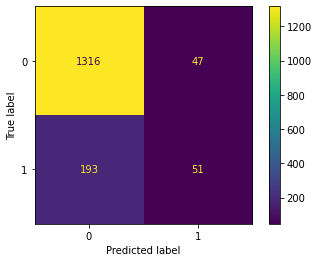

In [32]:
summary_report(y_test, y_test_pred, "Document-term Matrix(TF-IDF Vectorizer) - SVM/SVC")

# Neural Network

In [33]:
from sklearn.neural_network import MLPClassifier

# Using lbfgs over adam as it is much faster on smaller datasets(1min vs 6min(42k samples on M1 macbook air))
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.89      0.88      0.88      1363
     Helpful       0.37      0.39      0.38       244

    accuracy                           0.81      1607
   macro avg       0.63      0.64      0.63      1607
weighted avg       0.81      0.81      0.81      1607
 
Balanced acc score:  0.63656 
Balanced acc score(luck adjusted):  0.27312
Youden Index:  0.27312


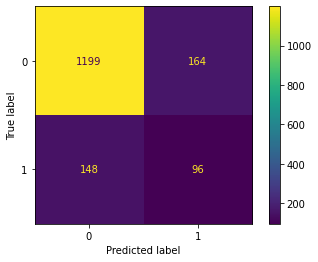

In [34]:
summary_report(y_test, y_test_pred, "MLPClassifier")

# KMeans clustering

MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.97      0.10      0.18      1363
     Helpful       0.16      0.98      0.28       244

    accuracy                           0.23      1607
   macro avg       0.57      0.54      0.23      1607
weighted avg       0.85      0.23      0.19      1607
 
Balanced acc score:  0.54023 
Balanced acc score(luck adjusted):  0.08045
Youden Index:  0.08045


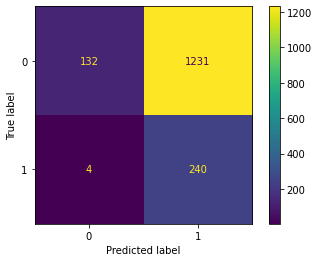

In [35]:
clf = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=5, random_state=5)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

summary_report(y_test, y_test_pred, "MLPClassifier")